# The scenario  will be as follows 
* Importing libraries
* Data preparation 
* Data preprocessing
* Analysis data
* Split data
* Evaluate model
* Conclusion

# Importing Libraries


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from random import randint


# Data preparation


In [2]:
df = pd.read_csv("card_transdata.csv")

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
# Creating a descriptive statistics table for data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
legit = df[df.fraud == 0]
fraud = df[df.fraud == 1]

In [8]:
print(legit.shape)
print(fraud.shape)
df['fraud'].value_counts()

(912597, 8)
(87403, 8)


0.0    912597
1.0     87403
Name: fraud, dtype: int64

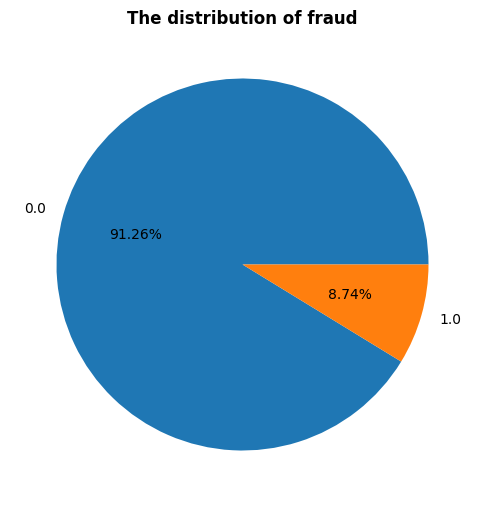

In [9]:
plt.figure(figsize = (6, 8))
plt.pie(x = df['fraud'].value_counts().values,
        labels = df['fraud'].value_counts().index, 
        autopct = '%1.2f%%')
plt.title('The distribution of fraud', size = 12, weight = 'bold')
plt.show()

As shown there's imbalanced data(undersampling or oversampling techniques to solve this problem).

# Visualization

In [10]:
category_features = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']

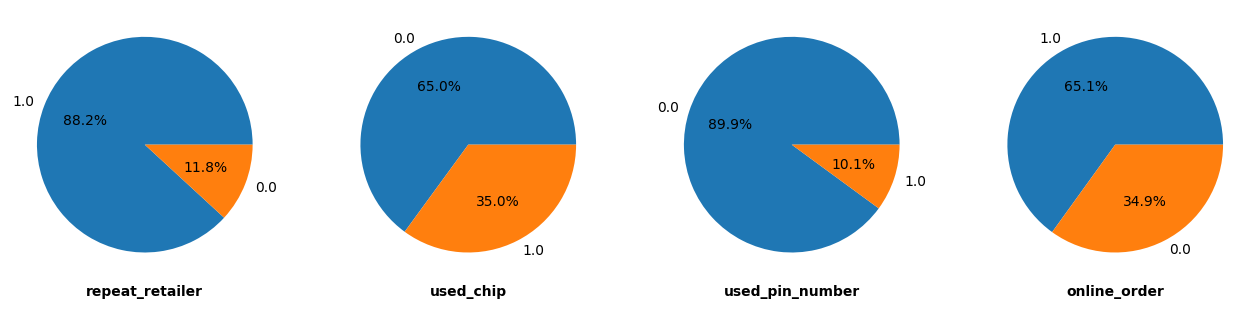

In [11]:
plt.figure(figsize = (16, 12))
for i, col in enumerate(category_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x = df[col].value_counts().values, 
            labels = df[col].value_counts().index, 
            autopct = '%1.1f%%')
    plt.xlabel(col, weight = 'bold')
plt.show()

## Data preprocessing

1. Missing Values

In [12]:
df.isnull().sum()
# or df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

2. Duplicate Values

In [13]:
# Check the sum of duplicate rows
print(f'# duplicate rows: {df.duplicated().sum()}')

# duplicate rows: 0


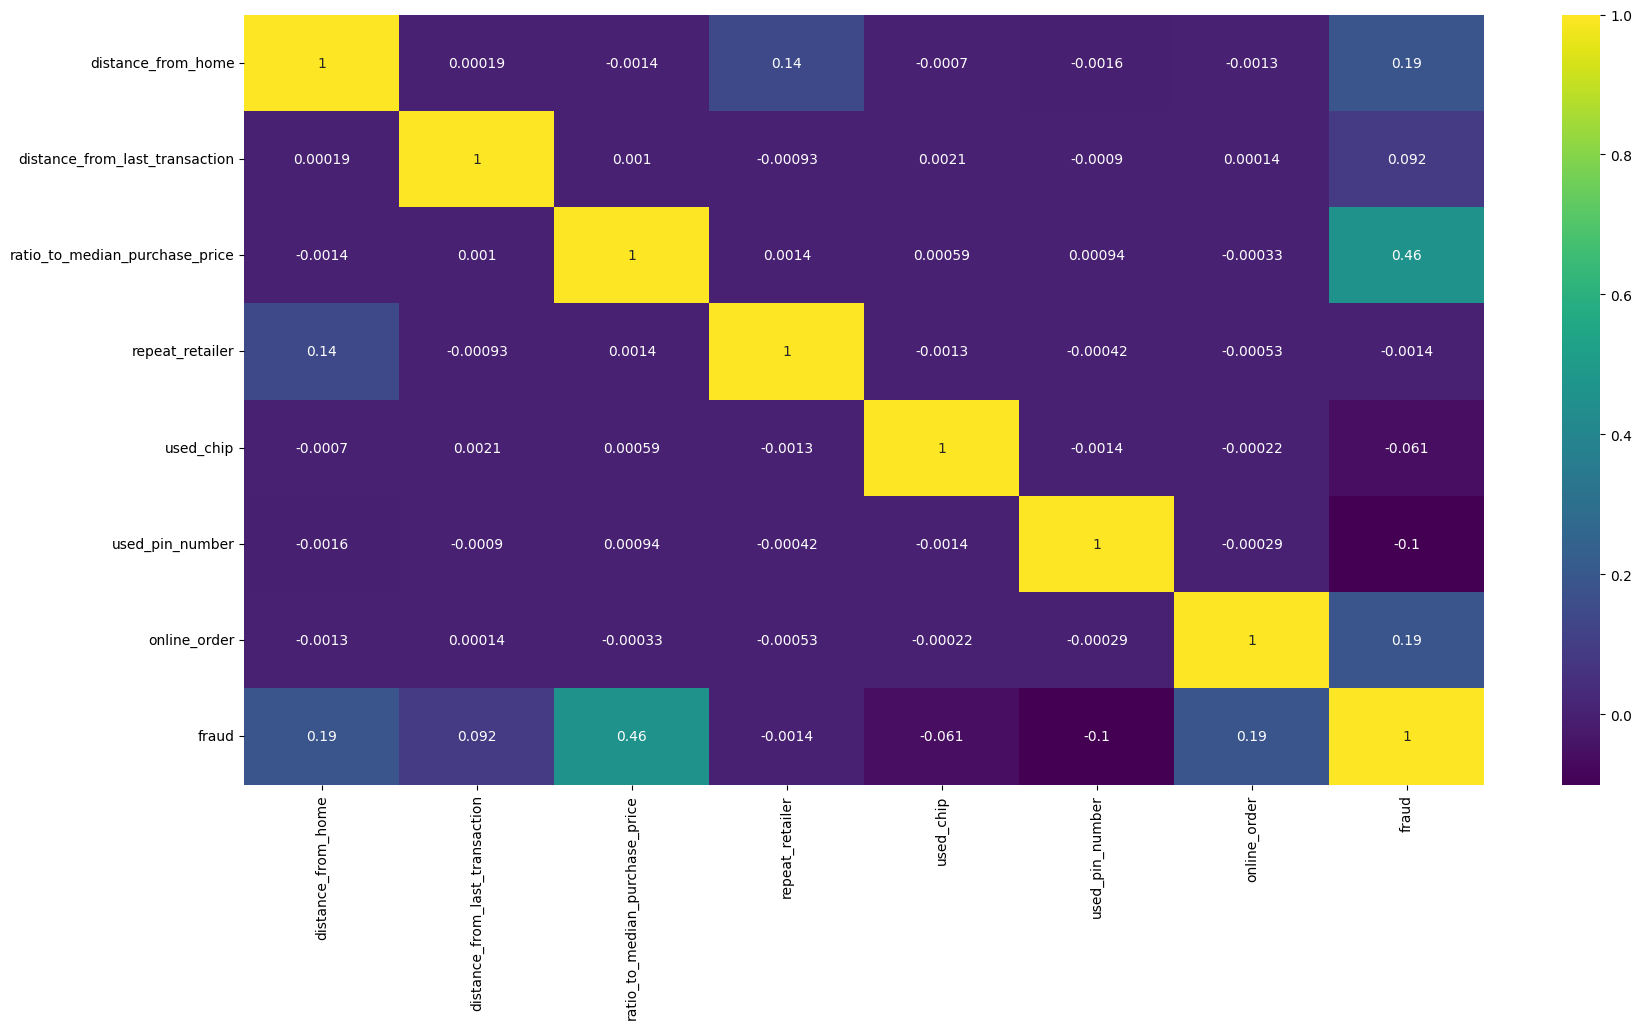

In [14]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap='viridis')
plt.show()

### Handling outliers

In [15]:
print(f' The number of samples before removing outliers: {df.shape[0]}')

 The number of samples before removing outliers: 1000000


In [16]:
#List containing numerical features to remove outliers
num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

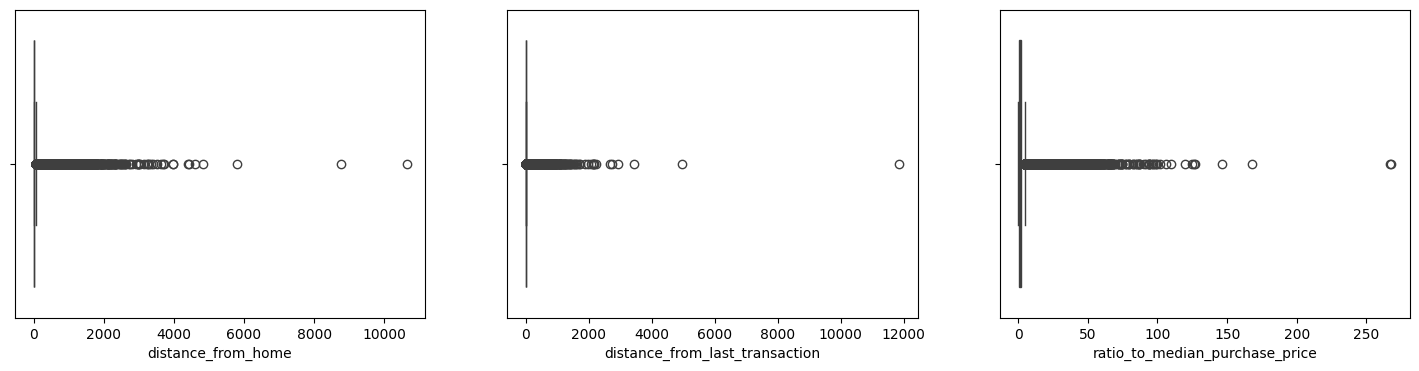

In [17]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = df, x = col)
plt.show()

In [18]:
# Remove outliers
def remove_outliers(df, col):
    
    # 1st quartile (25%)
    Q1 = df[col].quantile(0.25)
    # 3rd quartile (75%)
    Q3 = df[col].quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1    
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [19]:
data_no_outliers = df.copy()
# data_no_outliers = df.sort_values(by="distance_from_home")
for col in num_features:
    data_no_outliers = remove_outliers(data_no_outliers, col)

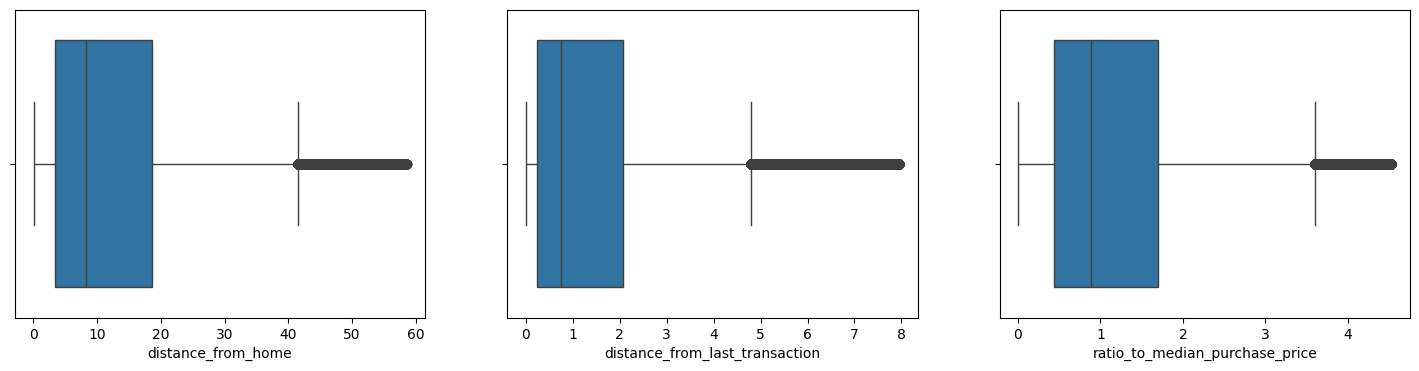

In [20]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = data_no_outliers, x = col)
plt.show()

In [21]:
print(f' The number of samples after removing outliers: {data_no_outliers.shape[0]}')

 The number of samples after removing outliers: 718686


In [22]:
legit_no_outliers = data_no_outliers[data_no_outliers.fraud == 0]
fraud_no_outliers = data_no_outliers[data_no_outliers.fraud == 1]
print(legit_no_outliers.shape)
print(fraud_no_outliers.shape)

(709694, 8)
(8992, 8)


##  Splitting data

In [23]:
X = data_no_outliers.drop('fraud', axis = 1)
y = data_no_outliers['fraud']

# Splitting data to X_train, y_train, X_test, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

#  Feature Scaling

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Oversampling


In [26]:
smote = SMOTE(sampling_strategy = 'minority', random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train, y_train)

In [27]:
# Count of each unique value in y_train
print(y_train.value_counts())
print(y_train_os.value_counts())

0.0    496786
1.0      6294
Name: fraud, dtype: int64
0.0    496786
1.0    496786
Name: fraud, dtype: int64


In [28]:
y_test.value_counts()

0.0    212908
1.0      2698
Name: fraud, dtype: int64

Undersampling


In [29]:
print(legit_no_outliers.shape[0])
print(fraud_no_outliers.shape[0])

709694
8992


In [30]:
data_us = data_no_outliers.sample(n=fraud_no_outliers.shape[0])

In [31]:
data_us.value_counts()

distance_from_home  distance_from_last_transaction  ratio_to_median_purchase_price  repeat_retailer  used_chip  used_pin_number  online_order  fraud
0.030511            0.294079                        0.389048                        0.0              0.0        0.0              0.0           0.0      1
13.883696           0.050353                        4.123333                        1.0              1.0        1.0              0.0           0.0      1
13.845429           0.018788                        1.405079                        1.0              1.0        0.0              0.0           0.0      1
13.858596           3.828575                        0.770211                        1.0              0.0        0.0              1.0           0.0      1
13.868824           0.165314                        1.693338                        1.0              0.0        0.0              0.0           0.0      1
                                                                                 

In [32]:
print(data_us.shape[0])
print(fraud_no_outliers.shape[0])

8992
8992


In [33]:
X_us = data_us.drop('fraud', axis = 1)
y_us = data_us['fraud']

# Splitting data to X_train, y_train, X_test, and y_test
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, stratify = y_us, test_size = 0.3, random_state = 42)

In [34]:
X_train_us = scaler.fit_transform(X_train_us)
X_test_us = scaler.transform(X_test_us)

In [35]:
print('X training shape(Oversample) = ', X_train.shape)
print('Y training shape(Oversample) = ', y_train.shape)
print('X test shape(Oversample)     = ', X_test.shape)
print('Y test shape(Oversample)     = ', y_test.shape)

X training shape(Oversample) =  (503080, 7)
Y training shape(Oversample) =  (503080,)
X test shape(Oversample)     =  (215606, 7)
Y test shape(Oversample)     =  (215606,)


In [36]:
print('X training shape(Undersample) = ', X_train_us.shape)
print('Y training shape(Undersample) = ', y_train_us.shape)
print('X test shape(Undersample)     = ', X_test_us.shape)
print('Y test shape(Undersample)     = ', y_test_us.shape)

X training shape(Undersample) =  (6294, 7)
Y training shape(Undersample) =  (6294,)
X test shape(Undersample)     =  (2698, 7)
Y test shape(Undersample)     =  (2698,)


# Train

In [64]:
knn_os = KNeighborsClassifier(n_neighbors=5)
knn_us = KNeighborsClassifier(n_neighbors=5)

In [65]:
knn_os.fit(X_train_os, y_train_os)
knn_us.fit(X_train_us, y_train_us)

KNeighborsClassifier()

In [39]:
print(f'# Accuracy of training model(OS): {knn_os.score(X_train_os, y_train_os)}')
print(f'# Accuracy of training model(US): {knn_us.score(X_train_us, y_train_us)}')

# Accuracy of training model(OS): 0.9995430628077281
# Accuracy of training model(US): 0.9974578964092787


# Predict

In [66]:
y_pred = knn_os.predict(X_test)
y_pred_us = knn_us.predict(X_test_us)

In [41]:
print(f'# Accuracy of test model(OS): {knn_os.score(X_test, y_test)}')
print(f'# Accuracy of test model(US): {knn_us.score(X_test_us, y_test_us)}')

# Accuracy of test model(OS): 0.9987662681001457
# Accuracy of test model(US): 0.9936990363232023


In [42]:
scores = cross_val_score(knn_os, X_train_os, y_train_os, cv=5)
scores_us = cross_val_score(knn_us, X_train_us, y_train_us, cv=5)
print('Cross-validation scores(Oversampling):', scores)
print('Mean cross-validation score(Oversampling):', scores.mean())
print('Cross-validation scores(Undersampling):', scores_us)
print('Mean cross-validation score(Undersampling):', scores_us.mean())

Cross-validation scores(Oversampling): [0.99924515 0.9993307  0.99926024 0.99926024 0.99932566]
Mean cross-validation score(Oversampling): 0.9992844001169019
Cross-validation scores(Undersampling): [0.99682288 0.99364575 0.99444003 0.99205719 0.99443561]
Mean cross-validation score(Undersampling): 0.9942802915984246


In [43]:
pred = cross_val_predict(knn_os, X_test, y_test)
pred_us = cross_val_predict(knn_us, X_test_us , y_test_us)
print(pred)
print(pred_us)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [70]:
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}
# Perform grid search cross-validation
# grid_search = GridSearchCV(knn_os, param_grid,scoring = 'recall', cv=5)
grid_search = GridSearchCV(knn_os, param_grid, cv=5)
grid_search_us = GridSearchCV(knn_us, param_grid, cv=5)
grid_search.fit(X_train_os, y_train_os)
grid_search_us.fit(X_train_us, y_train_us)

# Print the best parameter and best score
print('Best parameter(OS):', grid_search.best_params_)
print('Best score(OS):', grid_search.best_score_)
print('Best parameter(US):', grid_search_us.best_params_)
print('Best score(US):', grid_search_us.best_score_)

Best parameter(OS): {'n_neighbors': 3}
Best score(OS): 0.9994585193969
Best parameter(US): {'n_neighbors': 3}
Best score(US): 0.9953924115209916


In [71]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_us = confusion_matrix(y_test_us, y_pred_us)
print('Confusion matrix:')
print(cm)
print('Confusion matrix(US):')
print(cm_us)

Confusion matrix:
[[212652    256]
 [    10   2688]]
Confusion matrix(US):
[[2654    6]
 [  11   27]]


In [47]:
import plotly.figure_factory as ff

# drawing confusion matrix
fig = ff.create_annotated_heatmap(cm, colorscale='balance_r', showscale=True)
fig.update_layout(height=500, 
                  width=600, 
                  showlegend=True,
                 )

In [48]:
# drawing confusion matrix
fig = ff.create_annotated_heatmap(cm_us, colorscale='balance_r', showscale=True)
fig.update_layout(height=500, 
                  width=600, 
                  showlegend=True,
                 )

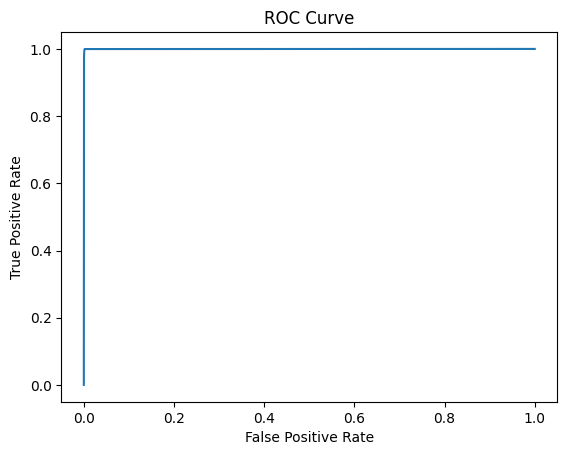

AUC: 0.9995688259355712


In [72]:
# Calculate predicted probabilities for class 1
y_pred_prob = knn_os.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC:', auc)

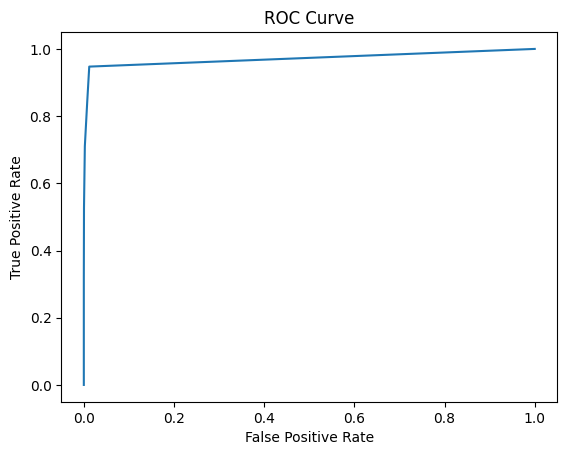

AUC: 0.9714137316976651


In [50]:
# Calculate predicted probabilities for class 1
y_pred_prob = knn_us.predict_proba(X_test_us)[:, 1]

# Calculate false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test_us, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test_us, y_pred_prob)
print('AUC:', auc)

### Linear Regression

In [51]:
lr_os = LinearRegression()
lr_us = LinearRegression()

In [52]:
lr_os.fit(X_train_os, y_train_os)
lr_us.fit(X_train_us, y_train_us)

LinearRegression()

In [74]:
y_pred_lr = lr_os.predict(X_test)
y_pred_lr_us = lr_us.predict(X_test_us)

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [75]:
print(f'# Accuracy of model(LR_OS): {lr_os.score(X_test, y_test)}')
print(f'# Accuracy of model(LR_US): {lr_us.score(X_test_us, y_test_us)}')

# Accuracy of model(LR_OS): -17.92793342951305
# Accuracy of model(LR_US): 0.13150948424070996


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [57]:
def NumbersOfEvaluation(numbers):
    for i in range(numbers):
        randomValue    = randint(0, len(data_no_outliers))
        predictedValue = lr_os.predict(scaler.transform([list(df.iloc[randomValue, :-1])])) 
        actualValue    = df.iloc[randomValue, -1]

        print(f"predicted value ==> {predictedValue} V.S actual value ==> {actualValue}")
NumbersOfEvaluation(12)

predicted value ==> [0.50928467] V.S actual value ==> 0.0
predicted value ==> [0.0230739] V.S actual value ==> 0.0
predicted value ==> [0.20204587] V.S actual value ==> 0.0
predicted value ==> [3.87095654] V.S actual value ==> 0.0
predicted value ==> [-0.14408927] V.S actual value ==> 0.0
predicted value ==> [1.58405538] V.S actual value ==> 1.0
predicted value ==> [1.46211635] V.S actual value ==> 1.0
predicted value ==> [-0.07977494] V.S actual value ==> 0.0
predicted value ==> [-0.15596341] V.S actual value ==> 0.0
predicted value ==> [0.18879215] V.S actual value ==> 0.0
predicted value ==> [-0.10007288] V.S actual value ==> 0.0
predicted value ==> [0.16519203] V.S actual value ==> 0.0


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\PC\AppData\Local\Programs\Pytho

### Logistic Regression

In [61]:
log_reg = LogisticRegression()

In [62]:
log_reg.fit(X_train_os, y_train_os)

LogisticRegression()

In [63]:
log_reg.score(X_train_os, y_train_os)

0.9968306272721051

# conclusion
* We have developed 3 models to classify the problem of whether the card fraud or not.
    * 1- Knn.
    * 2- Linear Regression.
    * 3- Logistic Regression.

    ### Result
    Comparing these three models, we conclude that the KNN model is the best model to be able to detect credit card fraud from our dataset.